## 1. Small Example

In [1]:
import heuristics
from data_util import *
from cluster import *

input1 = Input("address1", 1)
input2 = Input("address2", 2)
input3 = Input("address3", 3)
input4 = Input("address4", 4)
output1 = Output("address5", 1)

t1 = Transaction([input1, input2, input3, input4], [output1])


input5 = Input("address6", 1)
input6 = Input("address7", 2)
output2 = Output("address6", 8)
t2 = Transaction([input5, input6], [output2])

input7 = Input("address8", 1)
output3 = Output("address6", 8)
t3 = Transaction([input5, input7], [output3])

# my_clusters = cluster([t1], heuristics.shadow, 1)
my_clusters = cluster([t1, t2, t3], heuristics.multi_input)

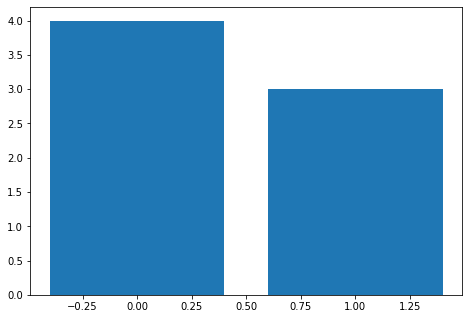

In [2]:
visualize_clusters(my_clusters)

## 2. Format raw data
Data is obtained from: https://www.kaggle.com/xblock/bitcoin-partial-transaction-dataset

In [1]:
from data_util import parse_data

In [2]:
parse_data('archive\dataset3_2016_1_1500000')

## 3. Run any clustering algorithm on the real data

In [37]:
import cluster
from data_util import load_data
from heuristics import multi_input

import pickle
import matplotlib.pyplot as plt
import numpy as np
import time
from collections import defaultdict

In [4]:
# Load pickled data
data = load_data('dataset3_2016_1_1500000.pkl')

In [13]:
# Obtain list of clusters from data
start_time = time.time()
clusters = cluster.cluster(data, multi_input)
print('Elapsed Time:', time.time() - start_time)

Elapsed Time: 651.8322789669037


In [16]:
# Save/Load cluster data for convenience
file_name = 'dataset3_muti_input.pkl'

if not clusters:
    with open(file_name, 'rb') as f:
        clusters = pickle.load(f)
else:
    with open(file_name, 'wb') as f:
        pickle.dump(clusters, f)

In [30]:
# Count the number of clusters at a given size
cluster_sizes = defaultdict(int)
total_addr = 0
for cluster in clusters:
    cluster_size = len(cluster)
    total_addr += cluster_size
    cluster_sizes[cluster_size] += 1

In [49]:
sizes = list(cluster_sizes.keys())
counts = list(cluster_sizes.values())
avg_size = sum(size * count for size, count in zip(sizes, counts)) / sum(counts)
avg_non_single_size = sum(size * count for size, count in zip(sizes, counts) if size > 1) / \
                      sum(count for size, count in zip(sizes, counts) if size > 1)
print('Total number of addresses:          ', total_addr)
print('Total number of clusters:           ', len(clusters))
print('Number of single-address clusters:  ', cluster_sizes[1])
print('Size of largest cluster:            ', max(sizes))
print('Average cluster size:               ', avg_size)
print('Average cluster size (excluding single-address clusters): ', avg_non_single_size)

Total number of addresses:           2651582
Total number of clusters:            1329209
Number of single-address clusters:   963516
Size of largest cluster:             119914
Average cluster size:                1.9948570916988977
Average cluster size (excluding single-address clusters):  4.616074138690103


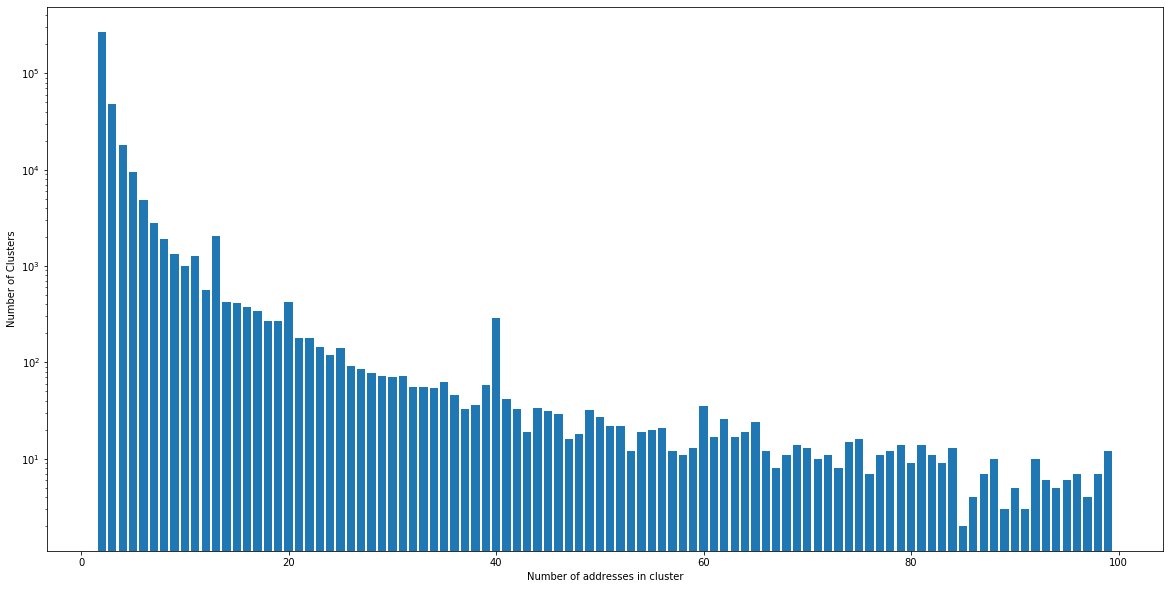

In [53]:
# Get cluster size counts in particular range
x, y = zip(*[(size, count) for size, count in cluster_sizes.items() if 100 > size > 1])

# Plot
plt.figure(figsize=(20,10))
plt.bar(x, y)
plt.ylabel('Number of Clusters')
plt.xlabel('Number of addresses in cluster')
plt.yscale('log')

## 4. Make a histogram for shadow

In [4]:
# this is ticket number 13 in github

# run __get_shadow_data(transactions) on the real data
# then make a histogram of the output

# based on the histogram, do you think we have a clear distinction of who is a merchant? 
# Or will we need to make an assumption on our own?

## Big one if you have time...

Implement the cluster comparisons

## If you have time to fix the visuals..
The cluster.visualize_clusters  looks a bit clunky. I had trouble getting the ticks to count by 1 instead of .25
Not a big deal for rn if you cant get it though